In [9]:
%cd ~/code/projects/paegan-code/
import torch
import my_utils
from models import PAEGAN
from IPython.display import HTML
import warnings
warnings.filterwarnings("ignore")

/home/ira/code/projects/paegan-code


## Predicting a single target

In [3]:
gif_counter = 0
net = PAEGAN().cuda()
net.load_state_dict(torch.load('experiments/one-pass/network/paegan_epoch_18.pth'))
sim_config = torch.load(open('_datasets/one-pass/train.conf', 'rb'))
my_utils.pf_multi_run_plot(net, sim_config, runs=1, p_mask=1.0, n_particles=300, gif_no=gif_counter)
HTML("""
Configuration: {1}
<br>
<img src="../ims/{0}-plot.png" align="center">
<table>
  <tr>
    <th>Observation</th>
    <th>Particle Filter</th> 
    <th>PF Sample</th> 
    <th>Predictive AE</th>
    <th>PAE Sample</th>
  </tr>
  <tr>
    <td><img src="../ims/{0}-percept.gif" width="140"></td>
    <td><img src="../ims/{0}-pf_belief.gif" width="140"></td> 
    <td><img src="../ims/{0}-pf_sample.gif" width="140"></td>
    <td><img src="../ims/{0}-pae_belief.gif" width="140"></td>
    <td><img src="../ims/{0}-pae_sample.gif" width="140"></td>
    
  </tr>

</table>""".format(gif_counter, sim_config))

Observation,Particle Filter,PF Sample,Predictive AE,PAE Sample
,,,,


### Commentary
Observations are unavailable for $t > 8$. From that point uncertainty in predictions increases for both methods. This is reflected as blur in the animations and as increasing reconstruction loss in the plot. Green dotted line signifies uninformed baseline -- reconstruction loss for outputting an average observation (a flat image). After some time without access to observation neither method does better than it (but also does do worse).

PF retains information about state of the environment for longer period of time. This is because PAE did not find the exact forward model. Notice variability and high quality of samples produced by PAE, compare to those produced by PF.

## Tracking a single target

In [3]:
gif_counter = 1
net = PAEGAN().cuda()
net.load_state_dict(torch.load('experiments/one-pass/network/paegan_epoch_18.pth'))
sim_config = torch.load(open('_datasets/one-pass/train.conf', 'rb'))
my_utils.pf_multi_run_plot(net, sim_config, runs=1, p_mask=0.95, n_particles=300, gif_no=gif_counter)
HTML("""
Configuration: {1}
<br>
<img src="../ims/{0}-plot.png" align="center">
<table>
  <tr>
    <th>Observation</th>
    <th>Particle Filter</th> 
    <th>PF Sample</th> 
    <th>Predictive AE</th>
    <th>PAE Sample</th>
  </tr>
  <tr>
    <td><img src="../ims/{0}-percept.gif" width="140"></td>
    <td><img src="../ims/{0}-pf_belief.gif" width="140"></td> 
    <td><img src="../ims/{0}-pf_sample.gif" width="140"></td>
    <td><img src="../ims/{0}-pae_belief.gif" width="140"></td>
    <td><img src="../ims/{0}-pae_sample.gif" width="140"></td>
    
  </tr>

</table>""".format(gif_counter, sim_config))

Ground truth,Particle Filter,PF Sample,Predictive AE,PAE Sample
,,,,


### Commentary
Uncertainty sharply decreases (visible by lower error and less blur in image) whenever new observation can be used for update. PF retains information about state for longer and allows for overall tracking with lower uncertainty.

## Predicting two targets bouncing

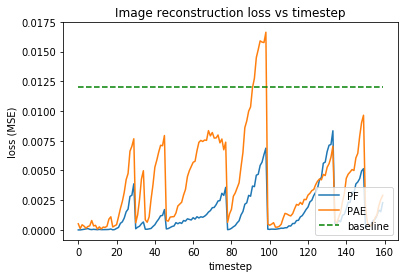

In [11]:
gif_counter = 2
net = PAEGAN().cuda()
net.load_state_dict(torch.load('experiments/tw/network/paegan_epoch_18.pth'))
sim_config = torch.load(open('_datasets/one-pass/train.conf', 'rb'))
my_utils.pf_multi_run_plot(net, sim_config, runs=1, p_mask=0.95, n_particles=300, gif_no=gif_counter)

### Commentary